In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle
#sklearn

In [136]:
# from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeCV

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
spotify_data = pd.read_csv("calhacksdata2clean.csv")
spotify_data2 = prep_data(spotify_data)
train, test = train_test_split(spotify_data2)
test.to_csv("test_set.csv")

In [172]:
spotify_data

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,This Is Me,Keala Settle,broadway,2017,2018‑05‑12,192,70,28,-7,4,10,235,1,19,83
1,Rewrite The Stars,Zac Efron,hollywood,2017,2018‑05‑12,125,62,68,-7,12,28,217,7,4,82
2,Never Enough,Loren Allred,deep talent show,2017,2018‑05‑12,87,39,28,-9,10,23,208,42,3,81
3,A Million Dreams,Ziv Zaifman,hollywood,2017,2018‑05‑12,55,31,27,-12,9,10,269,24,6,81
4,The Greatest Show,Hugh Jackman,hollywood,2017,2018‑05‑12,158,82,42,-7,7,40,302,0,11,81
5,The Other Side,Hugh Jackman,hollywood,2017,2018‑05‑12,154,80,64,-8,15,31,214,0,30,79
6,From Now On,Hugh Jackman,hollywood,2017,2018‑05‑12,108,52,52,-10,59,8,350,0,4,78
7,Come Alive,Hugh Jackman,hollywood,2017,2018‑05‑12,118,77,70,-9,21,24,226,1,13,78
8,A Million Dreams (Reprise),Austyn Johnson,hollywood,2017,2018‑05‑12,74,14,25,-17,27,10,60,73,4,75
9,Never Enough (Reprise),Loren Allred,deep talent show,2017,2018‑05‑12,82,5,38,-19,8,13,80,89,3,74


In [139]:
text_spotify = pd.read_csv("datawsent.csv")

In [140]:
#datacleaning

In [141]:
def prep_data(frame):
    frame_data = frame.drop_duplicates(subset='title', keep = 'first')
    frame_data = frame_data.drop(['year', 'added', 'live', 'pop'], axis = 1)
#     zero_bpm = frame_data[frame_data["bpm"] == 0].index[0]
#     frame_data = frame_data.drop([zero_bpm])
    frame_data["dur"] = frame_data["dur"].astype("float")
    return frame_data
spotify_data2 = prep_data(spotify_data)

In [142]:
def gen_mood(x):
    weights = np.array([10, 1, 1, 0.1, 50, 1])
    features = x.loc[['bpm','nrgy' , 'dnce', 'dB', 'val', 'acous']]
    return sum(features * weights) / (x.loc["dur"])



In [143]:
def normalize(col):
    col_range = max(col) - min(col)
    avg = np.mean(col)
    return (col - avg)/col_range


def prep_features(tbl):
    tbl_norm = tbl
    tbl_norm["bpm"] = normalize(tbl_norm["bpm"])
    tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
    tbl_norm["nrgy"] = normalize(tbl_norm["nrgy"])
    tbl_norm["val"] = normalize(tbl_norm["val"])
    tbl_norm["acous"] = normalize(tbl_norm["acous"])

    tbl_norm["dur"] = tbl_norm["dur"]/100
    return tbl_norm

In [144]:
spotify_data2 = prep_features(text_spotify)

In [145]:
# spotify_data2 = prep_features(spotify_data2)

In [146]:
train, test = train_test_split(spotify_data2)

In [147]:
#running logistic regression to create general moods
#replace with kmeans classifier or other

In [148]:
# min_val = train["val"].sort_values().iloc[0]
# max_val = train["val"].sort_values(ascending=False).iloc[0]
# val_range = max_val - min_val
# bins = val_range/5
# moods = np.arange(min_val, max_val, bins)

# def mood_convert(mood):
#     if mood < moods[0]:
#         return 0
#     if moods[0] <= mood < moods[1]:
#         return 1
#     if moods[1] <= mood < moods[2]:
#         return 2
#     if moods[2] <= mood < moods[3]:
#         return 3
#     if mood >= moods[3]:
#         return 4

# train["mood"] = train["val"].apply(lambda x: mood_convert(x))
# test["mood"] = test["val"].apply(lambda x: mood_convert(x))

# mod = LogisticRegressionCV()
# dropped = train.drop(['title', 'mood'], axis = 1)
# mod.fit(dropped, train["mood"])

In [149]:
# print(mod.score(train.iloc[:, 1:9], train["mood"]))
# print(mod.fit(dropped, train["mood"]))

In [150]:
# result = mod.predict(test.iloc[:, 1:9])
# test["predicted"] = result

In [151]:
#feature development
#Goal: create a continuous variable for mood

In [152]:
def norm_table(tbl):
    tbl_norm = tbl
#     tbl_norm["bpm"] = normalize(tbl_norm["bpm"])
#     tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
#     tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
#     tbl_norm["val"] = normalize(tbl_norm["val"])
#     tbl_norm["acous"] = normalize(tbl_norm["acous"])

#     tbl_norm["dur"] = tbl_norm["dur"]/100
    
    tbl_norm["mood_score"] = tbl_norm.apply(gen_mood, axis = 1)
    tbl_norm["mood_score"] = normalize(tbl_norm["mood_score"])
    in_1_range = 0
    if (v == 0):
        in_1_range = 1 /(np.std(tbl_norm["mood_score"]) * 3)
    else:
        in_1_range = 1 /(np.std(train_norm["mood_score"]) * 3)
    tbl_norm["mood_score"] = tbl_norm["mood_score"] * in_1_range
    return tbl_norm

In [153]:
v = 0
train_norm = norm_table(train)
v = 1
test_norm = test

In [154]:
test

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment
719,1706,Sandu,Clifford Brown,bebop,1989,0.126480,-0.164904,0.095242,-12,8,0.068382,2.97,0.253634,5,25,0.1,0.1
408,1134,A Shot In The Dark,Henry Mancini,adult standards,2000,0.006983,-0.082430,-0.078671,-12,20,-0.015828,1.53,-0.406366,4,26,0.0,0.0
47,47,The Day Before You Came,Meryl Streep,hollywood,2018,-0.118803,-0.402018,-0.209106,-16,8,-0.247407,3.29,0.453634,4,64,0.0,0.0
1241,4491,Self Control,Frank Ocean,hip hop,2016,-0.238300,-0.298925,0.019155,-10,36,-0.005302,2.50,0.293634,3,73,3.4,0.1
256,273,Oh What A Circus,Andrew Lloyd Webber,broadway,2018,0.082455,0.123756,-0.198236,-6,30,-0.184249,3.45,0.313634,4,23,9.0,0.0
0,0,This Is Me,Keala Settle,broadway,2017,0.466102,0.206230,-0.296062,-7,4,-0.373723,2.35,-0.466366,19,83,6.1,-0.1
1049,4723,Take Your Place,The Underachievers,hip hop,2015,0.013272,0.247467,0.247416,-9,20,-0.205302,2.13,-0.396366,21,45,5.6,-0.2
1359,4402,That's My Kind of Night (Instrumental Version),Instrumental Mafia,NaN,2013,-0.049621,0.041281,0.051764,-10,6,0.110488,1.90,-0.466366,4,1,0.0,0.0
335,1036,Christmas (Baby Please Come Home),Michael Bubl√©,adult standards,2012,0.051008,0.299013,-0.056932,-6,8,0.226277,1.88,-0.476366,3,58,3.4,0.3
966,5717,Ocean (feat. Khalid),Martin Garrix,big room,2018,0.139058,0.195921,-0.046062,-7,9,-0.247407,2.16,0.103634,4,88,6.3,0.4


In [155]:
def find_songs(tbl, score, epsilon):
    in_range = tbl[(score - epsilon < tbl["mood_score"]) &(score + epsilon > tbl["mood_score"])]
    in_range["dists"] = abs(in_range["mood_score"] - score)
    sort_by_dist = in_range.sort_values("dists")
    return sort_by_dist

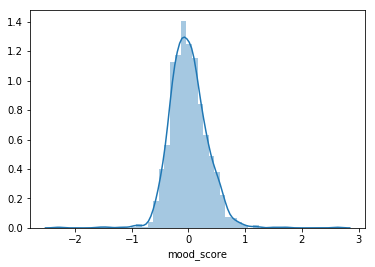

In [156]:
sns.distplot(train_norm["mood_score"])

In [157]:
find_songs(train_norm, 0.2, 0.05)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,dists
1500,4232,Heavy,Amber Riley,NaN,2017,0.195662,0.154683,-0.100410,-6,43,0.257856,2.84,0.143634,15,23,0.0,0.0,0.197813,0.002187
1088,4762,40 Cal,The Underachievers,hip hop,2016,-0.244589,0.453652,0.171329,-4,11,0.236803,1.84,-0.036366,18,38,3.2,0.0,0.202615,0.002615
1511,4245,Battle Of The Stars: Papa Was A Rolling Stone ...,Original Broadway Cast-Motown The Musical,NaN,2013,0.126480,0.340250,-0.035193,-6,11,0.247330,2.55,-0.436366,9,21,0.0,0.0,0.196691,0.003309
43,43,CAN'T STOP THE FEELING!,Justin Timberlake,dance pop,2016,-0.030753,0.329941,0.116981,-6,8,0.257856,2.37,-0.466366,7,64,6.6,0.2,0.196297,0.003703
1128,4701,War Ready,Vince Staples,conscious hip hop,2016,-0.131382,0.061900,0.312633,-7,20,0.194698,1.55,0.033634,28,47,3.1,-0.2,0.204067,0.004067
507,1256,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,dance pop,2017,0.227109,0.288704,0.095242,-6,8,0.131540,1.64,-0.426366,9,86,4.6,0.0,0.194494,0.005506
597,1352,Inside Out,Camila Cabello,dance pop,2018,-0.150250,0.206230,0.203938,-5,8,0.215751,1.83,-0.046366,9,65,5.1,0.5,0.194332,0.005668
955,5320,Starting Over (feat. Ben Bridwell),Macklemore & Ryan Lewis,pop rap,2012,0.290002,0.381488,-0.013454,-7,68,0.194698,2.51,0.243634,41,47,3.6,0.0,0.194303,0.005697
1390,4433,Lost Generation (Instrumental Version),Instrumental Mafia,NaN,2013,-0.005596,0.041281,0.290894,-7,9,0.247330,2.16,-0.476366,5,1,0.0,0.0,0.206600,0.006600
1495,4227,Hard To Say Goodbye,Liisi Lafontaine,NaN,2017,0.126480,0.206230,0.062633,-6,13,0.163119,1.86,0.143634,15,24,0.0,0.0,0.192933,0.007067


In [158]:
find_songs(train_norm, -0.1, 0.5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,dists
1232,4480,Japanese Denim,Daniel Caesar,indie r&b,2016,0.038430,-0.267997,0.171329,-9,8,-0.110565,2.71,-0.386366,4,75,2.5,0.1,-0.099658,0.000342
1031,5986,Dressed In Black,Sia,australian dance,2015,-0.194275,0.278395,-0.111280,-4,30,-0.142144,4.00,-0.446366,4,51,4.0,-0.3,-0.100603,0.000603
1133,4586,Hood Politics,Kendrick Lamar,conscious hip hop,2015,-0.187986,0.164993,0.193068,-7,12,-0.089512,2.93,-0.336366,38,61,9.1,-0.3,-0.099345,0.000655
134,142,Hold Me in Your Heart,Billy Porter,broadway,2013,0.277423,-0.195832,-0.285193,-9,15,-0.121091,1.84,0.163634,4,43,0.0,0.0,-0.101084,0.001084
295,315,The Beauty Underneath,Andrew Lloyd Webber,broadway,2018,-0.005596,0.247467,0.116981,-7,67,-0.131618,2.94,-0.266366,8,16,20.6,0.4,-0.101788,0.001788
1097,4771,Root of All Evil,The Underachievers,hip hop,2013,-0.250879,0.195921,0.193068,-5,12,-0.036881,2.00,-0.466366,12,36,3.4,0.0,-0.101905,0.001905
657,1433,Tiny Dancer,Elton John,glam rock,1971,0.170505,-0.072121,-0.154758,-11,15,-0.184249,3.77,-0.096366,3,76,3.3,0.1,-0.098086,0.001914
898,3322,"Uptown, Downtown",Bill Charlap Trio,bebop,2017,-0.345218,-0.278306,0.040894,-16,10,-0.078986,3.60,0.353634,4,53,0.0,0.0,-0.102025,0.002025
401,1125,Wasn't Born To Follow,Carole King,adult standards,1968,-0.250879,-0.092739,-0.089541,-12,7,-0.036881,2.24,0.193634,2,30,0.9,-0.1,-0.102253,0.002253
609,1368,ID,Kygo,edm,2015,-0.081067,0.185611,0.149590,-8,10,-0.121091,2.90,0.143634,4,62,0.1,0.1,-0.102419,0.002419


In [159]:
lm = RidgeCV()

In [160]:
lm.fit(train_norm.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]], train_norm["mood_score"])

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [161]:
test_norm["mood_predicted"] = lm.predict(test_norm.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])

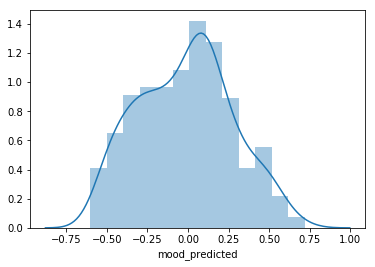

In [162]:
sns.distplot(test_norm["mood_predicted"])

In [163]:
train_norm["mood_score"] = train_norm["mood_score"] * 0.7 + train_norm["Sentiment"] * 0.3

In [164]:
def predict_songs(tbl):
    tbl_predicted = tbl
    predicted = lm.predict(tbl.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])
    tbl_predicted["mood_predicted"] = predicted
    return tbl_predicted
test_norm = predict_songs(test_norm)

In [165]:
predict_songs(train_norm)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,mood_predicted
103,108,Good Morning Baltimore,Nikki Blonsky,hollywood,2007,0.095033,0.350560,0.084372,-4,15,0.289435,2.34,-0.266366,6,50,6.6,0.4,0.297491,0.329468
608,1367,So Good (feat. Ty Dolla $ign),Zara Larsson,dance pop,2017,-0.225721,0.082518,0.193068,-7,5,0.342067,1.67,-0.386366,15,62,4.3,0.1,0.260625,0.299321
1224,4680,Opposites Attract (Tomorrow W/O Her),Kendrick Lamar,conscious hip hop,2010,0.466102,0.319632,0.062633,-6,26,0.142067,2.72,0.183634,44,49,14.8,-0.1,0.086953,0.271881
1003,5892,Cold Water,Major Lazer,dance pop,2016,-0.156539,0.309323,0.051764,-5,19,0.036803,1.85,-0.416366,5,72,5.4,-0.1,-0.037064,-0.012844
397,1121,Hey Girl,Carole King,adult standards,1980,0.315159,-0.092739,-0.002584,-7,14,-0.026354,2.22,-0.196366,3,31,1.6,-0.3,-0.082313,0.039720
1465,4193,I'm Free (Heaven Helps The Man),Jeremy Kushnier,NaN,2011,0.239687,0.072209,0.030025,-9,8,0.289435,2.62,-0.376366,12,30,0.0,0.0,0.163560,0.339253
827,3219,Branch,Keith Kenniff,compositional ambient,2011,0.139058,-0.329853,-0.122149,-15,11,-0.300039,1.26,0.493634,3,60,0.1,0.1,-0.305108,-0.296449
1559,4078,Remember Me (Ernesto de la Cruz),Benjamin Bratt,NaN,2017,0.069876,0.082518,-0.056932,-7,14,0.152593,1.09,0.073634,4,65,1.1,-0.5,0.044099,0.172190
46,46,Move Your Feet / D.A.N.C.E. / It's A Sunshine Day,Anna Kendrick,hollywood,2016,0.006983,0.329941,0.171329,-4,5,0.152593,1.56,-0.466366,6,64,7.9,0.6,0.307758,0.144298
532,1284,If You're Over Me,Years & Years,dance pop,2018,-0.087357,0.360869,0.106111,-5,6,0.173646,1.89,-0.416366,9,79,4.5,-0.3,0.015320,0.147181


In [166]:
def find_predicted_songs(tbl, score, num_songs):
    in_range = tbl
    
    in_range["dists"] = abs(in_range["mood_predicted"] - score)
    sort_by_dist = in_range.sort_values("dists")
    
    return sort_by_dist[:num_songs]

In [167]:
find_predicted_songs(test_norm, 0.9000000238418579, 25)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_predicted,dists
358,1063,Undecided,Ella Fitzgerald,adult standards,1998,0.560442,-0.206141,0.062633,-10,10,0.542067,2.01,0.403634,37,48,0.9,-0.3,0.720584,0.179416
1393,4436,Clarinet Marmalade,Porte√±a Jazz Band,NaN,2010,0.547863,0.247467,-0.056932,-9,73,0.521014,1.82,0.483634,43,1,0.0,0.0,0.682343,0.217657
1103,4777,The Dualist,The Underachievers,hip hop,2015,0.340316,0.350560,0.127851,-6,8,0.531540,2.69,-0.336366,23,35,5.9,0.0,0.629204,0.270796
333,1034,Hit The Road Jack,Ray Charles,adult standards,2009,0.346606,0.092828,0.040894,-13,82,0.531540,1.18,0.223634,32,58,5.2,-0.4,0.613416,0.286584
51,51,September,Justin Timberlake,dance pop,2016,0.057297,0.360869,0.236546,-3,3,0.531540,2.35,-0.456366,3,63,6.2,0.2,0.576909,0.323091
1401,4444,What a Night (Instrumental Version),Instrumental Mafia,NaN,2013,0.390631,0.195921,0.138720,-9,9,0.499961,1.71,-0.436366,14,0,0.0,0.0,0.575415,0.324585
1475,4207,Steamboat Willie,The Amazing Keystone Big Band,NaN,2017,-0.030753,0.010353,0.062633,-6,18,0.531540,1.43,0.103634,6,28,0.1,0.1,0.573748,0.326252
1621,4142,Everybody Needs Somebody To Love,The Blues Brothers,NaN,2005,0.478681,0.195921,-0.024323,-9,27,0.478909,1.50,-0.296366,3,44,0.0,0.0,0.572919,0.327081
674,1459,"I Can't Help Myself (Sugar Pie, Honey Bunch)",Four Tops,brill building pop,2008,0.057297,0.216539,0.149590,-5,6,0.531540,1.64,-0.276366,3,63,1.1,-0.3,0.570569,0.329431
1349,4392,More Than Friends (Instrumental Version),Instrumental Mafia,NaN,2013,0.063587,0.237158,0.453938,-10,4,0.542067,2.33,-0.456366,4,1,0.0,0.0,0.561137,0.338863


In [168]:
#control for epsilon with respet to std, to control # of songs that show up

In [169]:
#update weights with user input

In [170]:
#discrete classification to test generality of algorithm to see ballpark range
#linear regression for more nuanced moods

In [171]:
with open('lm.pickle', 'wb') as f:
    pickle.dump(lm, f)


In [104]:
with open('lm.pickle', 'rb') as fi:
    loaded_obj = pickle.load(fi)

In [ ]:
loaded_obj.predict(test.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])

In [ ]:
test.sort_values(by='bpm')

In [ ]:
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

In [ ]:
ex = [{"test": 5, "test1": 8}, {"test": 6, "test1": 7}]

In [ ]:
tst = pd.DataFrame()
tst = tst.from_dict(ex)

In [ ]:
new_labels = {"test": "hi", "test1": "hello"}

In [ ]:
tst.rename(columns=new_labels)